In [25]:
%matplotlib widget
#For documentation purpose, `inline` is used to enforce the storage of images into the notebook
# %matplotlib inline

import time
start_time = time.perf_counter()
from matplotlib.pyplot import subplots
import matplotlib.pylab as plt
import numpy as np
import fabio

In [2]:
import pyFAI, pyFAI.detectors
print("Using pyFAI version", pyFAI.version)
from pyFAI.gui import jupyter
from pyFAI.calibrant import get_calibrant
from pyFAI.azimuthalIntegrator import AzimuthalIntegrator

Using pyFAI version 2024.2.0


c:\Users\Teddy\anaconda3\envs\xrd\Lib\site-packages\pyopencl\cache.py:495: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  _create_built_program_from_source_cached(


In [32]:
wl = 1.54185e-10
cal = get_calibrant("AgBh")
cal.wavelength=wl

detector = pyFAI.detectors.Detector(100e-6, 100e-6)
detector.max_shape=(1000,1000)

timg = fabio.open("GIWAXS-1_3_1200-om0-5_AgBe-capillary_teddy.tif").data

ai = pyFAI.load("cal.poni")

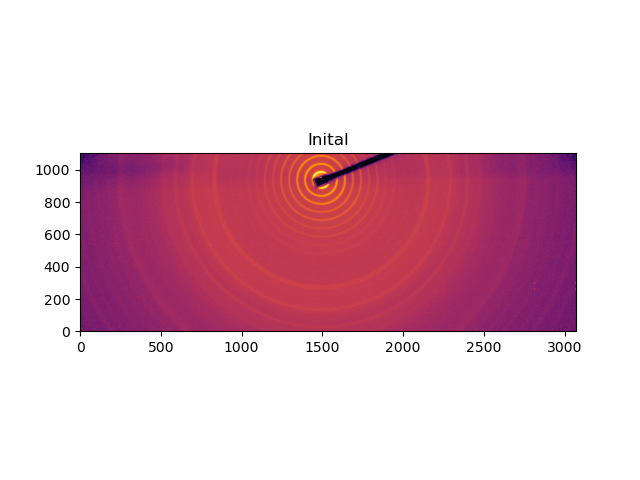

In [33]:
img = cal.fake_calibration_image(ai)
jupyter.display(timg, label="Inital")
pass


poni1: 0.05
poni2: 0.05


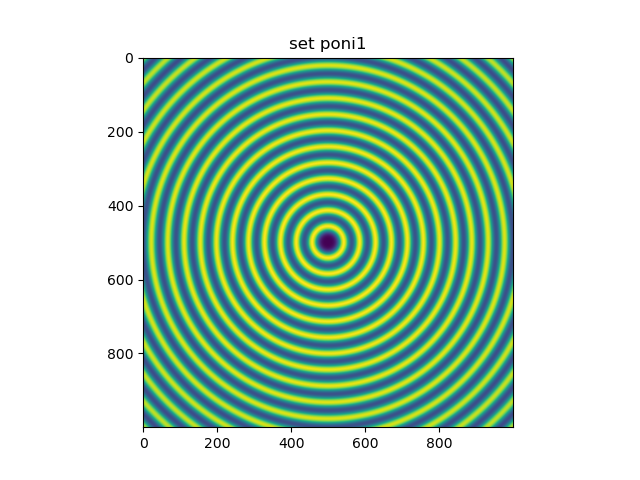

In [14]:
p1 = 100e-6 * 1000 / 2
print("poni1:", p1)
ai.poni1 = p1
p2 = 100e-6 * 1000 / 2
print("poni2:", p2)
ai.poni2 = p2
ai.dist = 0.25
img = cal.fake_calibration_image(ai)
jupyter.display(img, label="set poni1")
pass
plt.imshow(img)